In [44]:
import pandas as pd

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
from datetime import datetime

## 1. Let's load and prepare the data

In [47]:
ebola=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/Python4DS103/main/data/country_timeseries.csv')

In [48]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [49]:
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [50]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

### 1.1. Let's cast time related columns as datetimes
#### date column is not codified as a datetime, this is not optimal

In [51]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [52]:
ebola[['Date','Day','date_dt']].head()

,Date,Day,date_dt
0,1/5/2015,289,2015-01-05
1,1/4/2015,288,2015-01-04
2,1/3/2015,287,2015-01-03
3,1/2/2015,286,2015-01-02
4,12/31/2014,284,2014-12-31


In [53]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

#### Once we have it in datetime64 format we apply time specific operations, for instance extrac time components

In [54]:
ebola['year'] = ebola['date_dt'].dt.year

In [55]:
ebola['month'] = ebola['date_dt'].dt.month

In [56]:
ebola['day'] = ebola['date_dt'].dt.day

In [57]:
ebola[['Date','Day','date_dt','year','month','day']].head()

,Date,Day,date_dt,year,month,day
0,1/5/2015,289,2015-01-05,2015,1,5
1,1/4/2015,288,2015-01-04,2015,1,4
2,1/3/2015,287,2015-01-03,2015,1,3
3,1/2/2015,286,2015-01-02,2015,1,2
4,12/31/2014,284,2014-12-31,2014,12,31


### 1.2. Set date as index
### in the case of panel data it is most convenient to define time based indexes

In [58]:
ebola.set_index('date_dt',inplace=True)

In [59]:
ebola.sort_index(inplace=True)

In [60]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year,month,day
date_dt,,,,,,,,,,,,,,,,,,,,,
2014-03-22,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,22
2014-03-24,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,24
2014-03-25,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,25
2014-03-26,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,26
2014-03-27,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,...,6.0,5.0,NaN,NaN,NaN,NaN,NaN,2014,3,27


In [61]:
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali', 'year', 'month', 'day'],
      dtype='object')

In [62]:
dataToPlot=ebola[['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali']]


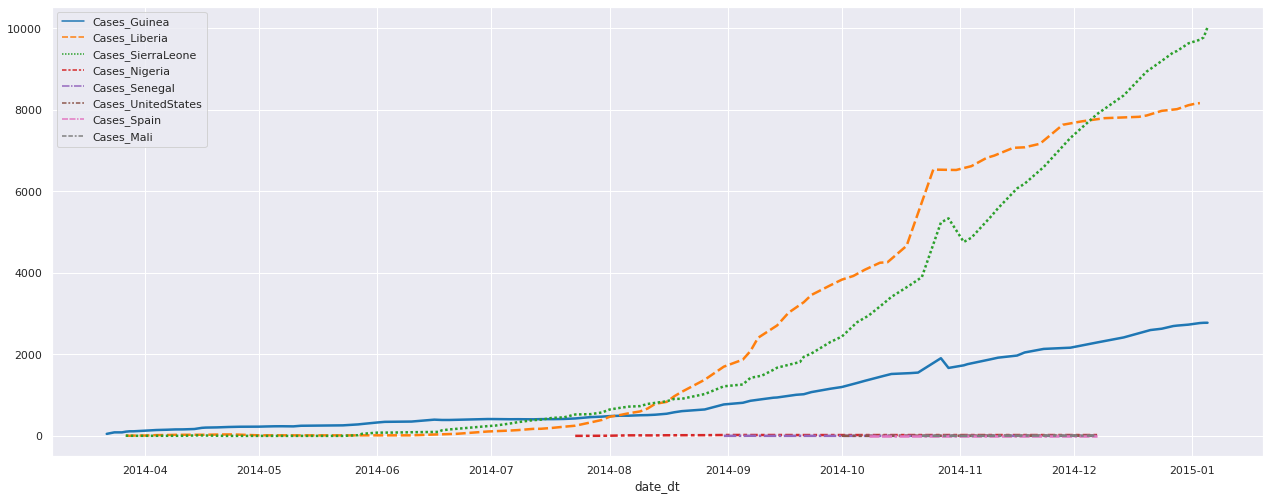

In [63]:
sns.set(rc={'figure.figsize':(21.7,8.27)})
sns.lineplot(data=dataToPlot, palette="tab10", linewidth=2.5)

## 2. Operations

### 2.1. Slicing
### once we have time elements in the index it becomes straightforward to select time frames

In [64]:
ebola.loc['2014-04-01':'2014-04-10']

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year,month,day
date_dt,,,,,,,,,,,,,,,,,,,,,
2014-04-01,4/1/2014,10,127.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,...,5.0,2.0,NaN,NaN,NaN,NaN,NaN,2014,4,1
2014-04-04,4/4/2014,13,143.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,...,7.0,2.0,NaN,NaN,NaN,NaN,NaN,2014,4,4
2014-04-07,4/7/2014,16,151.0,21.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10.0,2.0,NaN,NaN,NaN,NaN,NaN,2014,4,7
2014-04-09,4/9/2014,18,158.0,25.0,2.0,NaN,NaN,NaN,NaN,NaN,...,12.0,2.0,NaN,NaN,NaN,NaN,NaN,2014,4,9


In [65]:
ebola.loc['2014-04-01':'2014-04-01']

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year,month,day
date_dt,,,,,,,,,,,,,,,,,,,,,
2014-04-01,4/1/2014,10,127.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,...,5.0,2.0,NaN,NaN,NaN,NaN,NaN,2014,4,1


In [66]:
ebola.loc['2014']

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year,month,day
date_dt,,,,,,,,,,,,,,,,,,,,,
2014-03-22,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,22
2014-03-24,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,24
2014-03-25,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,25
2014-03-26,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,26
2014-03-27,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,...,6.0,5.0,NaN,NaN,NaN,NaN,NaN,2014,3,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-21,12/21/2014,273,2597.0,NaN,9004.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2582.0,NaN,NaN,NaN,NaN,NaN,2014,12,21
2014-12-24,12/24/2014,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,...,3413.0,2655.0,NaN,NaN,NaN,NaN,NaN,2014,12,24
2014-12-27,12/27/2014,280,2695.0,NaN,9409.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2732.0,NaN,NaN,NaN,NaN,NaN,2014,12,27


In [67]:
ebola.loc['2015']

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year,month,day
date_dt,,,,,,,,,,,,,,,,,,,,,
2015-01-02,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,2
2015-01-03,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,...,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,2015,1,3
2015-01-04,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015,1,4
2015-01-05,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015,1,5


### 2.2. Shifting operations
### It is a common operation to shift time series data. We may need to make a comparison between lagged or lead features. In our data frame, we can create a new feature that contains ebola cases of the previous day.

In [68]:
ebola[['Cases_Guinea']].loc['2014-04-01':'2014-04-15']

,Cases_Guinea
date_dt,
2014-04-01,127.0
2014-04-04,143.0
2014-04-07,151.0
2014-04-09,158.0
2014-04-11,159.0
2014-04-14,168.0
2014-04-15,NaN


In [69]:
ebola[['Cases_Guinea']].loc['2014-04-01':'2014-04-15'].shift(1)

,Cases_Guinea
date_dt,
2014-04-01,NaN
2014-04-04,127.0
2014-04-07,143.0
2014-04-09,151.0
2014-04-11,158.0
2014-04-14,159.0
2014-04-15,168.0


In [70]:
ebola['Cases_Guinea_Lag_15']=ebola[['Cases_Guinea']].shift(15)

In [71]:
ebola[['Cases_Guinea','Cases_Guinea_Lag_15']].head(20)

,Cases_Guinea,Cases_Guinea_Lag_15
date_dt,,
2014-03-22,49.0,NaN
2014-03-24,86.0,NaN
2014-03-25,86.0,NaN
2014-03-26,86.0,NaN
2014-03-27,103.0,NaN
2014-03-28,112.0,NaN
2014-03-29,112.0,NaN
2014-03-31,122.0,NaN
2014-04-01,127.0,NaN


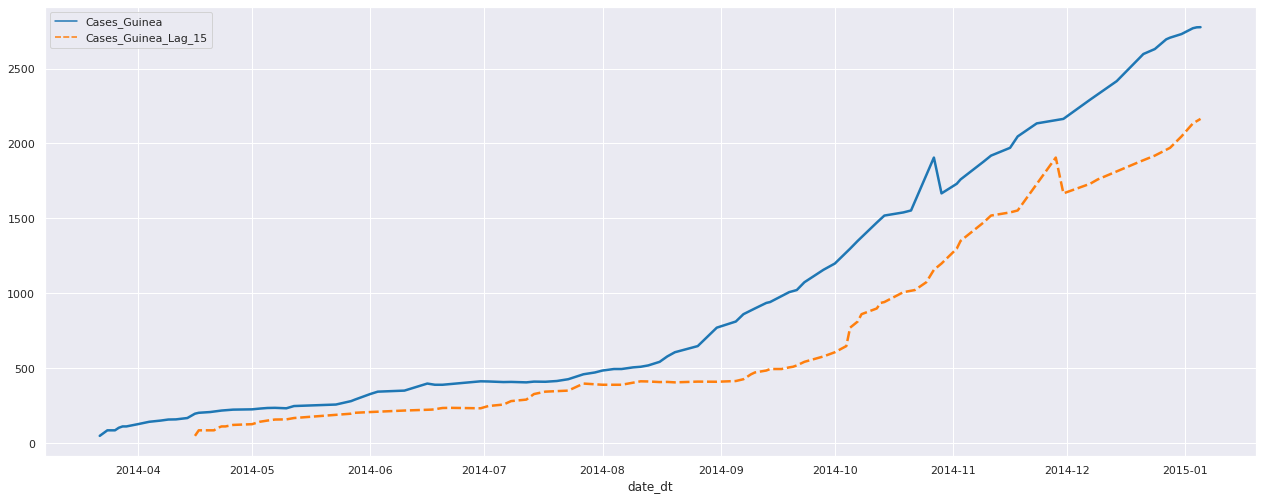

In [72]:
sns.set(rc={'figure.figsize':(21.7,8.27)})
sns.lineplot(data=ebola[['Cases_Guinea','Cases_Guinea_Lag_15']], palette="tab10", linewidth=2.5)

## 3. Resampling 
### 3.1. Basic

In [73]:
ebola[['Cases_Guinea']].loc['2014-04-01':'2014-4-30']

,Cases_Guinea
date_dt,
2014-04-01,127.0
2014-04-04,143.0
2014-04-07,151.0
2014-04-09,158.0
2014-04-11,159.0
2014-04-14,168.0
2014-04-15,NaN
2014-04-16,197.0
2014-04-17,203.0


In [74]:
ebola[['Cases_Guinea']].loc['2014-04-01':'2014-4-30'].resample("W").mean()

,Cases_Guinea
date_dt,
2014-04-06,135.0
2014-04-13,156.0
2014-04-20,194.0
2014-04-27,221.0


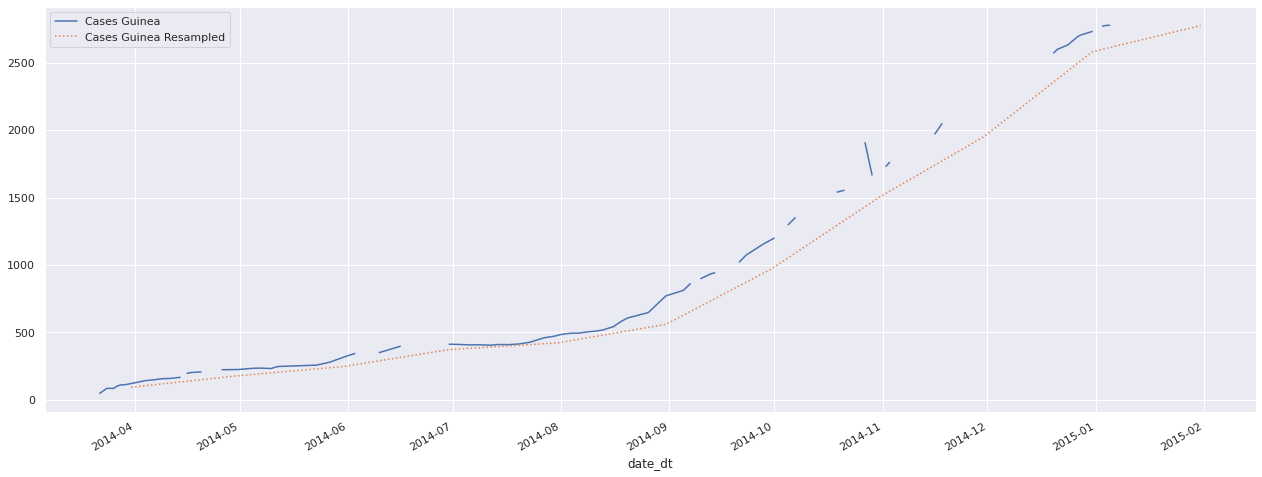

In [75]:
fig, ax = plt.subplots()
ebola[['Cases_Guinea']].plot( style='-',ax=ax)
ebola[['Cases_Guinea']].resample("M").mean().plot(style=':',ax=ax)

plt.legend(['Cases Guinea', 'Cases Guinea Resampled'])
plt.show()

#### 3.2. Advanced

In [76]:
ebola[['Cases_Guinea','Deaths_Guinea']].loc['2014-04-01':'2014-4-30']

,Cases_Guinea,Deaths_Guinea
date_dt,,
2014-04-01,127.0,83.0
2014-04-04,143.0,86.0
2014-04-07,151.0,95.0
2014-04-09,158.0,101.0
2014-04-11,159.0,106.0
2014-04-14,168.0,108.0
2014-04-15,NaN,NaN
2014-04-16,197.0,122.0
2014-04-17,203.0,129.0


In [77]:
ebola[['Cases_Guinea','Deaths_Guinea']].loc['2014-04-01':'2014-4-30'].resample('10D',label='right', closed='right').agg({'Cases_Guinea':'mean','Deaths_Guinea':'sum'})

,Cases_Guinea,Deaths_Guinea
date_dt,,
2014-04-01,127.00,83.0
2014-04-11,152.75,388.0
2014-04-21,194.00,495.0
2014-05-01,221.00,284.0


In [78]:
ebolaResampled=ebola[['Cases_Guinea','Deaths_Guinea']].resample('30D',label='right', closed='right').agg({'Cases_Guinea':'mean','Deaths_Guinea':'sum'})

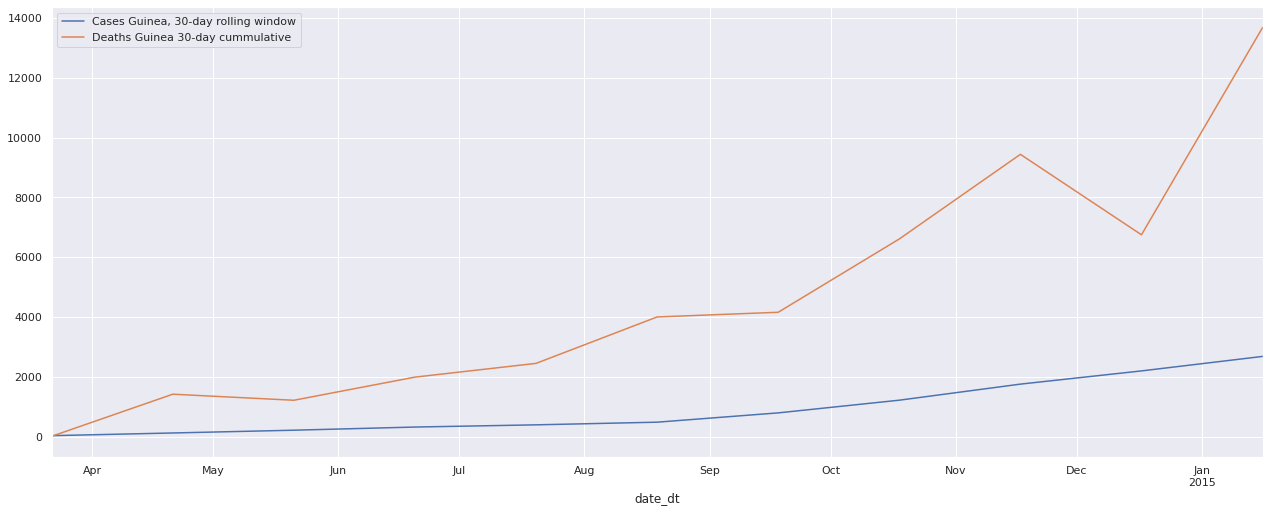

In [79]:
ebolaResampled.plot()
plt.legend(['Cases Guinea, 30-day rolling window', 'Deaths Guinea 30-day cummulative'])
plt.show()

### 4. Interpolation
### sometimes we have missing data, pandas offers suppport to interpolare

In [80]:
ebola[['Cases_Guinea']].loc['2014-04-01':'2014-4-30']

,Cases_Guinea
date_dt,
2014-04-01,127.0
2014-04-04,143.0
2014-04-07,151.0
2014-04-09,158.0
2014-04-11,159.0
2014-04-14,168.0
2014-04-15,NaN
2014-04-16,197.0
2014-04-17,203.0


In [81]:
ebola[['Cases_Guinea']].loc['2014-04-01':'2014-4-30'].interpolate()

,Cases_Guinea
date_dt,
2014-04-01,127.000000
2014-04-04,143.000000
2014-04-07,151.000000
2014-04-09,158.000000
2014-04-11,159.000000
2014-04-14,168.000000
2014-04-15,182.500000
2014-04-16,197.000000
2014-04-17,203.000000


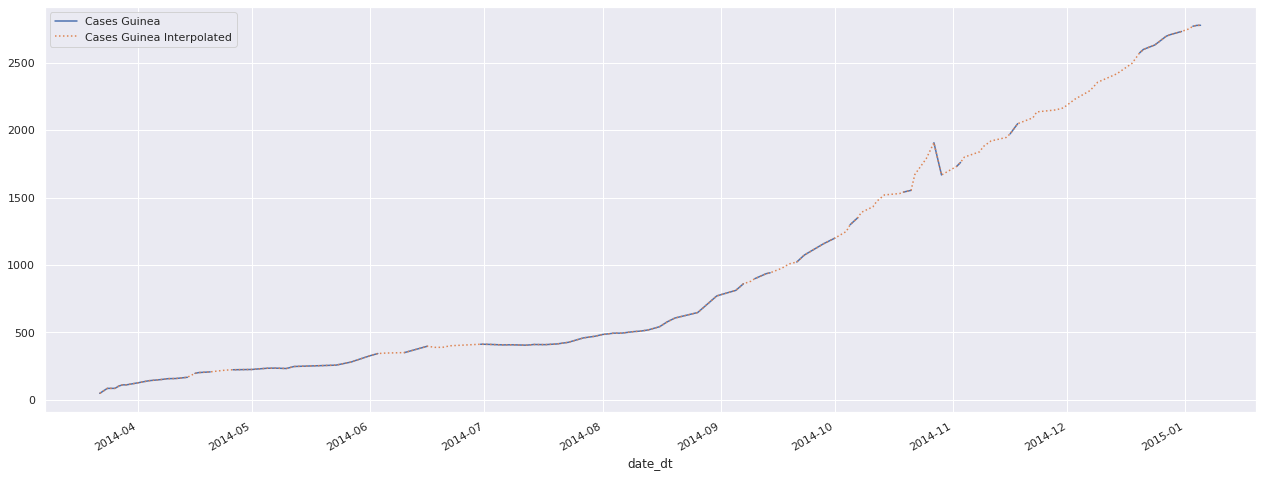

In [82]:
fig, ax = plt.subplots()
ebola[['Cases_Guinea']].plot( style='-',ax=ax)
ebola[['Cases_Guinea']].interpolate().plot(style=':',ax=ax)

plt.legend(['Cases Guinea', 'Cases Guinea Interpolated'])
plt.show()

## 5. Rolling Windows

### pandas contains a compact set of APIs for performing windowing operations - an operation that performs an aggregation over a sliding partition of values. The API functions similarly to the groupby API in that Series and DataFrame call the windowing method with necessary parameters and then subsequently call the aggregation function.

### Generic rolling windows support specifying windows as a fixed number of observations or variable number of observations based on an offset. If a time based offset is provided, the corresponding time based index must be monotonic.

### For all supported aggregation functions, see Rolling window functions.
https://pandas.pydata.org/pandas-docs/stable/reference/window.html#api-functions-rolling

In [83]:
ebola[['Cases_Guinea','Cases_Liberia','Cases_SierraLeone']].loc['2014-04-01':'2014-4-30']

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
date_dt,,,
2014-04-01,127.0,8.0,2.0
2014-04-04,143.0,18.0,2.0
2014-04-07,151.0,21.0,2.0
2014-04-09,158.0,25.0,2.0
2014-04-11,159.0,26.0,2.0
2014-04-14,168.0,NaN,NaN
2014-04-15,NaN,NaN,12.0
2014-04-16,197.0,27.0,NaN
2014-04-17,203.0,27.0,NaN


In [84]:
ebola[['Cases_Guinea','Cases_Liberia','Cases_SierraLeone']].loc['2014-04-01':'2014-4-30'].rolling(window='10D').sum()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
date_dt,,,
2014-04-01,127.0,8.0,2.0
2014-04-04,270.0,26.0,4.0
2014-04-07,421.0,47.0,6.0
2014-04-09,579.0,72.0,8.0
2014-04-11,611.0,90.0,8.0
2014-04-14,636.0,72.0,6.0
2014-04-15,636.0,72.0,18.0
2014-04-16,833.0,99.0,18.0
2014-04-17,885.0,105.0,16.0


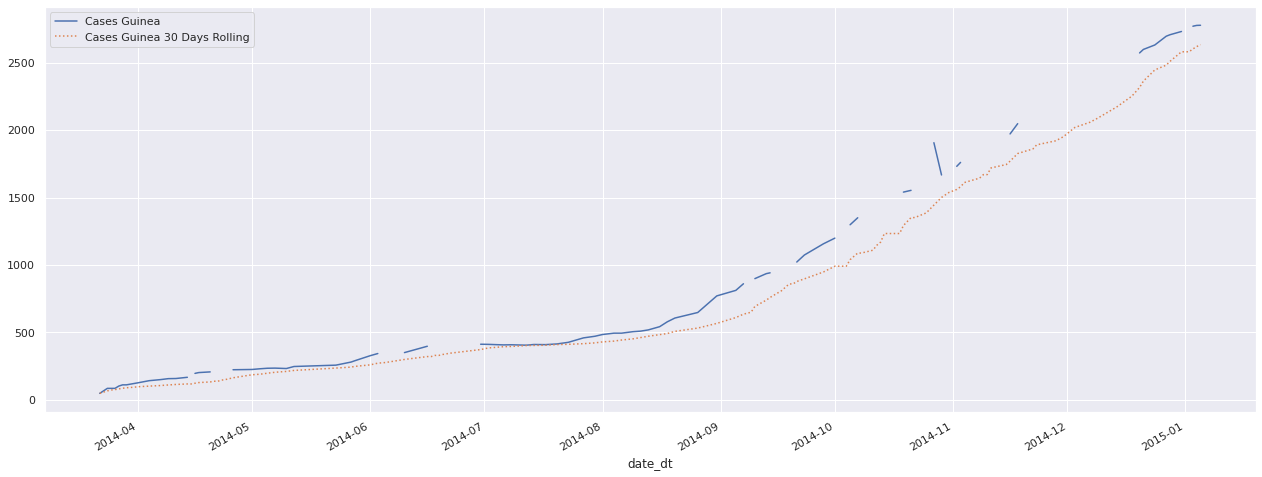

In [85]:
fig, ax = plt.subplots()
ebola[['Cases_Guinea']].plot( style='-',ax=ax)
ebola[['Cases_Guinea']].rolling(window='30D').mean().plot(style=':',ax=ax)

plt.legend(['Cases Guinea', 'Cases Guinea 30 Days Rolling'])
plt.show()

### 6. rolling pairwise covariances and correlations

In [86]:
ebola[['Cases_Guinea','Cases_Liberia','Cases_SierraLeone']].loc['2014-04-01':'2014-4-30'].rolling(window='60D').cov(pairwise=True)

Cases_Guinea  Cases_Liberia  Cases_SierraLeone
date_dt                                                                     
2014-04-01 Cases_Guinea                NaN            NaN                NaN
           Cases_Liberia               NaN            NaN                NaN
           Cases_SierraLeone           NaN            NaN                NaN
2014-04-04 Cases_Guinea         128.000000      80.000000           0.000000
           Cases_Liberia         80.000000      50.000000           0.000000
           Cases_SierraLeone      0.000000       0.000000           0.000000
2014-04-07 Cases_Guinea         149.333333      82.666667           0.000000
           Cases_Liberia         82.666667      46.333333           0.000000
           Cases_SierraLeone      0.000000       0.000000           0.000000
2014-04-09 Cases_Guinea         177.583333      96.333333           0.000000
           Cases_Liberia         96.333333      52.666667           0.000000
           Cases_SierraLeone      0.000000       0.000000           0.000000
2014-04-11 Cases_Guinea         173.800000      95.050000           0.000000
           Cases_Liberia         95.050000      52.300000           0.000000
           Cases_SierraLeone      0.000000       0.000000           0.000000
2014-04-14 Cases_Guinea         208.400000      95.050000           0.000000
           Cases_Liberia         95.050000      52.300000           0.000000
           Cases_SierraLeone      0.000000       0.000000           0.000000
2014-04-15 Cases_Guinea         208.400000      95.050000           0.000000
           Cases_Liberia         95.050000      52.300000           0.000000
           Cases_SierraLeone      0.000000       0.000000          16.666667
2014-04-16 Cases_Guinea         475.952381     136.966667           0.000000
           Cases_Liberia        136.966667      50.966667           0.000000
           Cases_SierraLeone      0.000000       0.000000          16.666667
2014-04-17 Cases_Guinea         665.928571     155.690476           0.000000
           Cases_Liberia        155.690476      47.904762           0.000000
           Cases_SierraLeone      0.000000       0.000000          16.666667
2014-04-20 Cases_Guinea         805.194444     155.690476           0.000000
           Cases_Liberia        155.690476      47.904762           0.000000
           Cases_SierraLeone      0.000000       0.000000          16.666667
2014-04-21 Cases_Guinea         805.194444     155.690476           0.000000
           Cases_Liberia        155.690476      59.928571           0.000000
           Cases_SierraLeone      0.000000       0.000000          16.666667
2014-04-22 Cases_Guinea         805.194444     155.690476           0.000000
           Cases_Liberia        155.690476      59.928571           0.000000
           Cases_SierraLeone      0.000000       0.000000          15.809524
2014-04-23 Cases_Guinea         963.511111     155.690476         -23.466667
           Cases_Liberia        155.690476      59.928571           0.000000
           Cases_SierraLeone    -23.466667       0.000000          14.785714
2014-04-24 Cases_Guinea         963.511111     155.690476         -23.466667
           Cases_Liberia        155.690476      67.777778          -5.133333
           Cases_SierraLeone    -23.466667      -5.133333          13.777778
2014-04-26 Cases_Guinea        1101.763636     155.690476         -34.952381
           Cases_Liberia        155.690476      67.777778          -5.133333
           Cases_SierraLeone    -34.952381      -5.133333          12.844444

In [87]:
ebola[['Cases_Guinea','Cases_Liberia','Cases_SierraLeone']].loc['2014-04-01':'2014-4-30'].rolling(window='60D').corr(pairwise=True)

Cases_Guinea  Cases_Liberia  Cases_SierraLeone
date_dt                                                                     
2014-04-01 Cases_Guinea                NaN            NaN                NaN
           Cases_Liberia               NaN            NaN                NaN
           Cases_SierraLeone           NaN            NaN                NaN
2014-04-04 Cases_Guinea           1.000000       1.000000                NaN
           Cases_Liberia          1.000000       1.000000                NaN
           Cases_SierraLeone           NaN            NaN                NaN
2014-04-07 Cases_Guinea           1.000000       0.993814                NaN
           Cases_Liberia          0.993814       1.000000                NaN
           Cases_SierraLeone           NaN            NaN                NaN
2014-04-09 Cases_Guinea           1.000000       0.996111                NaN
           Cases_Liberia          0.996111       1.000000                NaN
           Cases_SierraLeone           NaN            NaN                NaN
2014-04-11 Cases_Guinea           1.000000       0.996957                NaN
           Cases_Liberia          0.996957       1.000000                NaN
           Cases_SierraLeone           NaN            NaN                NaN
2014-04-14 Cases_Guinea           1.000000       0.996957                NaN
           Cases_Liberia          0.996957       1.000000                NaN
           Cases_SierraLeone           NaN            NaN                NaN
2014-04-15 Cases_Guinea           1.000000       0.996957                NaN
           Cases_Liberia          0.996957       1.000000                NaN
           Cases_SierraLeone           NaN            NaN           1.000000
2014-04-16 Cases_Guinea           1.000000       0.821237                NaN
           Cases_Liberia          0.821237       1.000000                NaN
           Cases_SierraLeone           NaN            NaN           1.000000
2014-04-17 Cases_Guinea           1.000000       0.809264                NaN
           Cases_Liberia          0.809264       1.000000                NaN
           Cases_SierraLeone           NaN            NaN           1.000000
2014-04-20 Cases_Guinea           1.000000       0.809264                NaN
           Cases_Liberia          0.809264       1.000000                NaN
           Cases_SierraLeone           NaN            NaN           1.000000
2014-04-21 Cases_Guinea           1.000000       0.809264                NaN
           Cases_Liberia          0.809264       1.000000                NaN
           Cases_SierraLeone           NaN            NaN           1.000000
2014-04-22 Cases_Guinea           1.000000       0.809264                NaN
           Cases_Liberia          0.809264       1.000000                NaN
           Cases_SierraLeone           NaN            NaN           1.000000
2014-04-23 Cases_Guinea           1.000000       0.809264          -0.925163
           Cases_Liberia          0.809264       1.000000                NaN
           Cases_SierraLeone     -0.925163            NaN           1.000000
2014-04-24 Cases_Guinea           1.000000       0.809264          -0.925163
           Cases_Liberia          0.809264       1.000000          -0.696982
           Cases_SierraLeone     -0.925163      -0.696982           1.000000
2014-04-26 Cases_Guinea           1.000000       0.809264          -0.956657
           Cases_Liberia          0.809264       1.000000          -0.696982
           Cases_SierraLeone     -0.956657      -0.696982           1.000000